# DBSCAN

1. 밀집도 기반의 군집 형성 알고리즘
2. K-Means와 달리 k 없이 군집가능
3. leaf부터 시작해서 최종 1개의 그룹을 형성할때까지 클러스터링
4. 그룹화 조건 : eps:5, n:5
5. 모든 클러스터링은 원의 반경(epsillon) : 3으로 동일
    - Center 노드 :  3개의 노드수
    - 경계 노드 : 2개의 노드수 (1개:포인트노드, 1개:Center노드)
    - 노이즈 노드 : 2개의 노드수 (1개:포인트노드, 1개:포인트노드)
    - Center 노드 : 5개의 노드수 (3개의 노드수 +2)

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
import numpy as np

In [3]:
iris = datasets.load_iris()
cols = ['Sepal length','Sepal width','Petal length','Petal width']
df = pd.DataFrame(iris.data, columns=cols)
df['target'] =  iris.target
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# X_feature = df[['Sepal length','Sepal width']]
X_feature = df[['Petal length','Petal width']]


In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
pred_cluster = dbscan.fit_predict(X_feature)
df["pred_cluster"] = pred_cluster
df["labels_"]= dbscan.labels_
# print(dbscan.labels_)

In [37]:
y_label_ = df["labels_"]
c_coef = silhouette_samples(X_feature, y_label_)
print("실루엣계수(각node별)", c_coef[:5])

# avg_score = np.mean(c_coef)
# print(avg_score)

avg_coef = silhouette_score(X_feature, y_label_)
print("실루엣계수 평균(전체node평균)",avg_coef)

실루엣계수(각node별) [0.9545365  0.9545365  0.94298065 0.95334577 0.9545365 ]
실루엣계수 평균(전체node평균) 0.7669465622770762


# 검증: 교차테이블

In [24]:
y = df["target"]
tab = pd.crosstab(y, pred_cluster)
print(tab)

col_0   -1   0   1   2   3   4
target                        
0       14  19  10   7   0   0
1       39   0   0   0   6   5
2       50   0   0   0   0   0


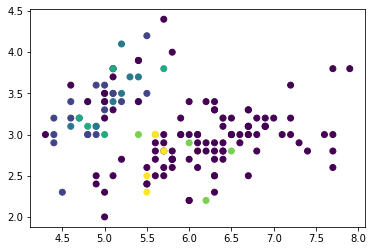

In [25]:
# centers = pd.DataFrame(dbscan.cluster_centers_,columns=X_feature)
# center_x = centers['Sepal length']
# center_y = centers['Sepal width']

# scatter plot
plt.scatter(df['Sepal length'],  df['Sepal width'], c=df["pred_cluster"] )
# plt.scatter(center_x, center_y,  marker='*'      ,  c='r')
plt.show()

0.1 ------------------------------------------------------------ 
 col_0   -1   0
target        
0       33  17
1       50   0
2       50   0


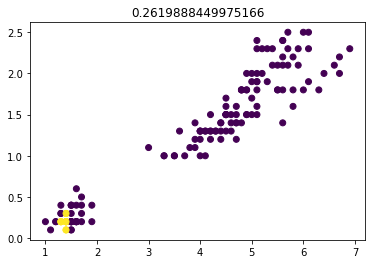

0.5 ------------------------------------------------------------ 
 col_0   -1   0   1
target            
0        0  50   0
1        1   0  49
2        5   0  45


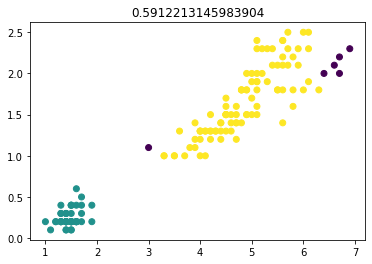

1 ------------------------------------------------------------ 
 col_0    0   1
target        
0       50   0
1        0  50
2        0  50


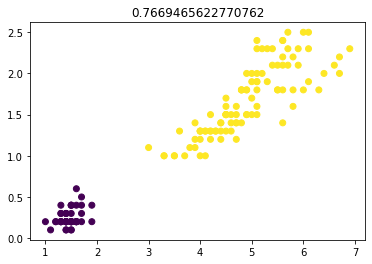

1.2 ------------------------------------------------------------ 
 col_0    0   1
target        
0       50   0
1        0  50
2        0  50


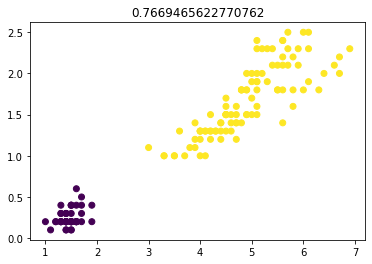

1.5 ------------------------------------------------------------ 
 col_0    0
target    
0       50
1       50
2       50


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

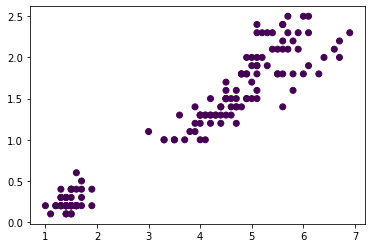

In [38]:
eps=[0.1, 0.5, 1, 1.2, 1.5]
for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=15, metric='euclidean')
    pred_cluster = dbscan.fit_predict(X_feature)
    
    ctab = pd.crosstab(df["target"], pred_cluster)
    
    print(e, "--"*30, "\n", ctab)
    
    plt.scatter(df['Petal length'],  df['Petal width'], c=pred_cluster )
    plt.title(silhouette_score(X_feature, dbscan.labels_))  
    #coef = =np.mean(센터노드 - 각 점들간의 거리) 이 값이 0에 가까울수록 좋다
    #silhouette : mean(센터노드 - 각 점들간의 거리) / max(거리) ==1 (정규분포)
    #           : -1 : 노이즈노드(반경에서 속하지 못하는 노드반경에서 속하지 못하는 노드)
    plt.show()